<h2>Daily Minimum Temperatures in Melbourne, Australia</h2>

In [2]:
## read the data set
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
print(df.head())


            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


In [3]:
df.isnull().sum()

Temp    0
dtype: int64

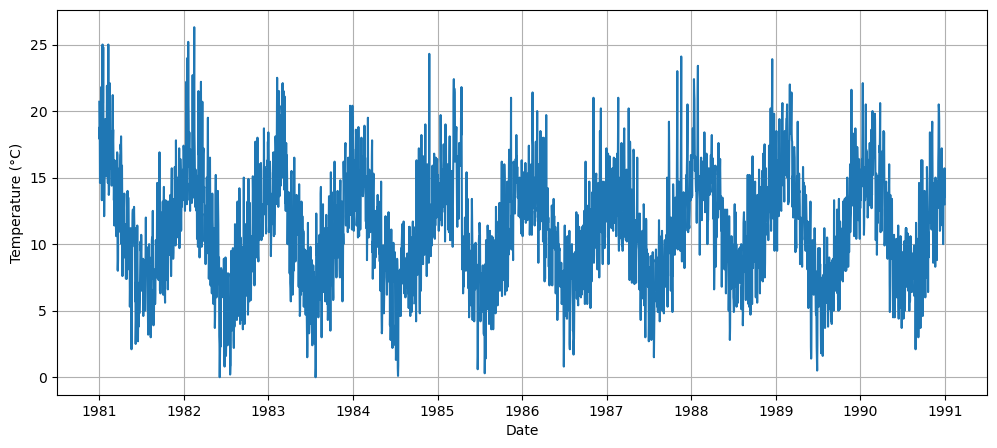

In [4]:
# Q1. Visualize the temperature trend over the years
plt.figure(figsize=(12,5))
sns.lineplot(x='Date',y='Temp',data=df)
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

<h2>Difference Between Stationary and Non-Stationary Data</h2>

<h5>Stationary Data</h5>
Definition - Data whose statistical properties (mean, variance, etc.) don’t change over time.<br>		
Mean & Variance - Constant over time<br>	
Trend/Seasonality  - No trend or seasonality<br>	
Examples - White noise, residuals after removing trend/seasonality<br>	
Model Suitability - Good for ARMA, AR models	

<h5>Non-Stationary Data</h5>
Definition - Data whose statistical properties change over time.<br>
Mean & Variance - Vary over time<br>
Trend/Seasonality - Often has trend or seasonality<br>
Examples - Stock prices, temperature data, sales over time<br>
Model Suitability - Needs to be made stationary (e.g., differencing) for ARIMA

<h4>Why do we need to check for stationarity?</h4>
Many models (like ARIMA) require the series to be stationary.<br>
If your data is non-stationary, the model might predict incorrectly.<br>
We can transform a non-stationary series (e.g., with differencing) into a stationary one.

 <h3>How do we check stationarity</h3>

<h5>We use the ADF (Augmented Dickey-Fuller) Test.</h5>
<b>from statsmodels.tsa.stattools import adfuller</b><br>
We're importing adfuller from the statsmodels library.<br>
<b>result = adfuller(df['Temp'])</b><br>
This function performs the ADF test, which checks whether a time series is stationary.<br>
df['Temp'] is the column we're testing (the temperature values).<br>
<b>print(f'ADF statistics:{result[0]}')</b>
<b>print(f'P-values: {result[1]}')</b><br>
adfuller(...) runs the test and returns a list of results:<br>

result[0]: ADF statistic<br>

result[1]: p-value<br>

result[2]: number of lags used<br>

result[4]: critical values (1%, 5%, 10%)<br>
<b>ADF Statistic:</b> A negative number — the more negative, the stronger the signal of stationarity<br>

<b>p-value:</b> The most important part — it tells us if the result is statistically significant

<h4>How to interpret the p-value</h4>
p-value > 0.05<br>		               x
Meaning - Non-Stationary ❌<br>
Conclusion - We fail to reject the null hypothesis<br>
<hr>
p-value ≤ 0.05<br>
Meaning - Stationary ✅	<br>
Conclusion - We reject the null hypothesis (good!)<br>
<hr>

<b>Null Hypothesis:</b> The series is non-stationary<br>
<b>Alternate Hypothesis:</b> The series is stationary<br>

<br>
✅ Example output:

ADF Statistic: -4.123
p-value: 0.003
📌 Since 0.003 < 0.05, we reject the null and say the data is stationary.

🔧 If p-value > 0.05 → Data is not stationary →  should:
Use .diff() to difference the series:


df['Temp_diff'] = df['Temp'].diff().dropna()
Then rerun the adfuller() test on the new differenced series:


adfuller(df['Temp_diff'].dropna())

In [12]:
# Q2. Check if the temperature series is stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Temp'])
print(f'ADF statistics:{result[0]}')
print(f'P-values: {result[1]}')

ADF statistics:-4.444804924611694
P-values: 0.00024708263003610394


<h3>Q4. Detect anomalies using rolling statistics</h3>

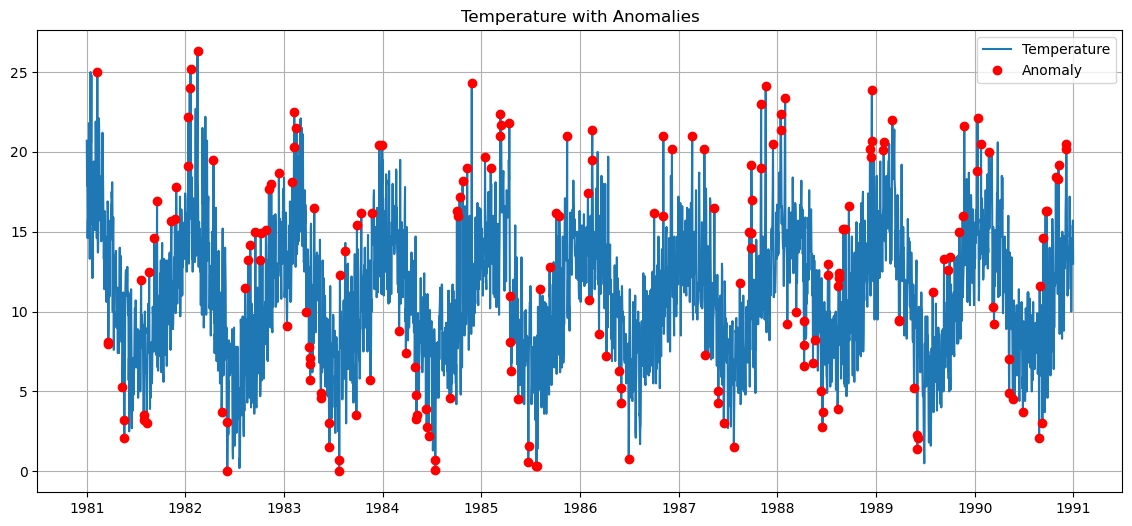

In [14]:
rolling_mean = df['Temp'].rolling(window=30).mean()
rolling_std = df['Temp'].rolling(window=30).std()

'''Creates a new column 'Anomaly' in the DataFrame.
Sets it to True where:
Temperature is above: Mean + 2×Std
OR
Temperature is below: Mean - 2×Std
📌 Why:
These thresholds (±2σ) catch data points that are statistically rare (≈ 95% of data falls within 2σ in a normal distribution).
So anything outside is likely abnormal behavior.'''
df['Anomaly'] = (df['Temp'] > rolling_mean + 2 * rolling_std) | (df['Temp'] < rolling_mean - 2 * rolling_std)

# Plot with anomalies
plt.figure(figsize=(14, 6))
plt.plot(df['Temp'], label='Temperature')
plt.plot(df[df['Anomaly']]['Temp'], 'ro', label='Anomaly')
plt.title('Temperature with Anomalies')
plt.legend()
plt.grid(True)
plt.show()


<body>

  <h2>Summary Table</h2>

  <table border="1">
    <thead>
      <tr>
        <th>Scenario</th>
        <th>Next Step After Detecting Anomalies</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>Exploratory analysis</td>
        <td>No action needed, just insights</td>
      </tr>
      <tr>
        <td>ML model building</td>
        <td>Remove or handle outliers</td>
      </tr>
      <tr>
        <td>Live monitoring</td>
        <td>Trigger alerts/actions</td>
      </tr>
      <tr>
        <td>Business investigation</td>
        <td>Dig into other data for root cause</td>
      </tr>
      <tr>
        <td>Dashboards/reports</td>
        <td>Display anomalies visually</td>
      </tr>
    </tbody>
  </table>

</body>

<h4>Q5. Forecast future temperatures using ARIMA</h4>

                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                 3630
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8373.063
Date:                Mon, 14 Apr 2025   AIC                          16752.127
Time:                        16:15:40   BIC                          16770.717
Sample:                             0   HQIC                         16758.749
                               - 3630                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4636      0.018     26.470      0.000       0.429       0.498
ma.L1         -0.9204      0.008   -110.529      0.000      -0.937      -0.904
sigma2         5.9083      0.130     45.581      0.0

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


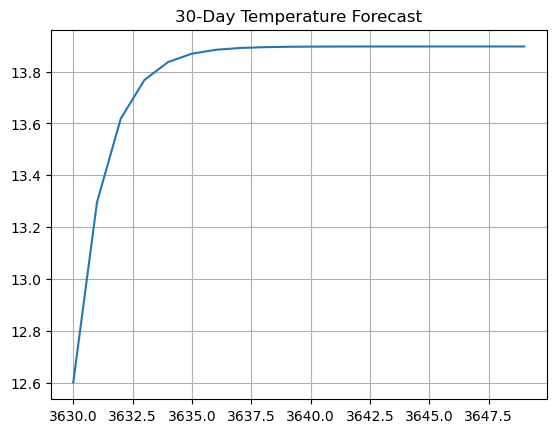

In [17]:
from statsmodels.tsa.arima.model import ARIMA
# Select a range to forecast (e.g., last 20 actual points)
train_data = df['Temp'][:-20]
test_data = df['Temp'][-20:]
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())
forecast = model_fit.forecast(steps=20)
forecast.plot(title='30-Day Temperature Forecast')
plt.grid(True)
plt.show()


'''df['Temp']: the time series you're modeling (temperature in this case)

order=(1, 1, 1):

p=1: Use 1 lag of past data for AR (AutoRegression)

d=1: Apply 1st order differencing to make data stationary

q=1: Use 1 lag of forecast error for MA (Moving Average)

📌 You’re basically telling Python:

“Build a model that uses yesterday’s value and yesterday’s error to predict today — but first, make the data stationary using 1st differencing.”
'''

<body>

  <h2>Summary of Each Component</h2>

  <table border="1">
    <thead>
      <tr>
        <th>Code</th>
        <th>What It Does</th>
        <th>Why It’s Used</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>ARIMA()</td>
        <td>Create model</td>
        <td>Define what kind of model</td>
      </tr>
      <tr>
        <td>order=(p,d,q)</td>
        <td>Set ARIMA config</td>
        <td>Tune based on data (ACF/PACF)</td>
      </tr>
      <tr>
        <td>model.fit()</td>
        <td>Train the model</td>
        <td>Learn from historical data</td>
      </tr>
      <tr>
        <td>model_fit.forecast()</td>
        <td>Predict future</td>
        <td>Use model to forecast</td>
      </tr>
      <tr>
        <td>print()</td>
        <td>Show results</td>
        <td>See the actual predictions</td>
      </tr>
    </tbody>
  </table>

</body>

In [20]:
print("Actual values:")
print(test_data.values)

print("\nPredicted values:")
print(forecast.values)

Actual values:
[14.  11.4 12.5 13.4 13.6 13.9 17.2 14.7 15.4 13.1 13.2 13.9 10.  12.9
 14.6 14.  13.6 13.5 15.7 13. ]

Predicted values:
[12.60031462 13.29583893 13.618274   13.76775027 13.83704532 13.86916951
 13.88406182 13.89096568 13.89416621 13.89564993 13.89633777 13.89665664
 13.89680446 13.89687299 13.89690476 13.89691948 13.89692631 13.89692948
 13.89693094 13.89693162]


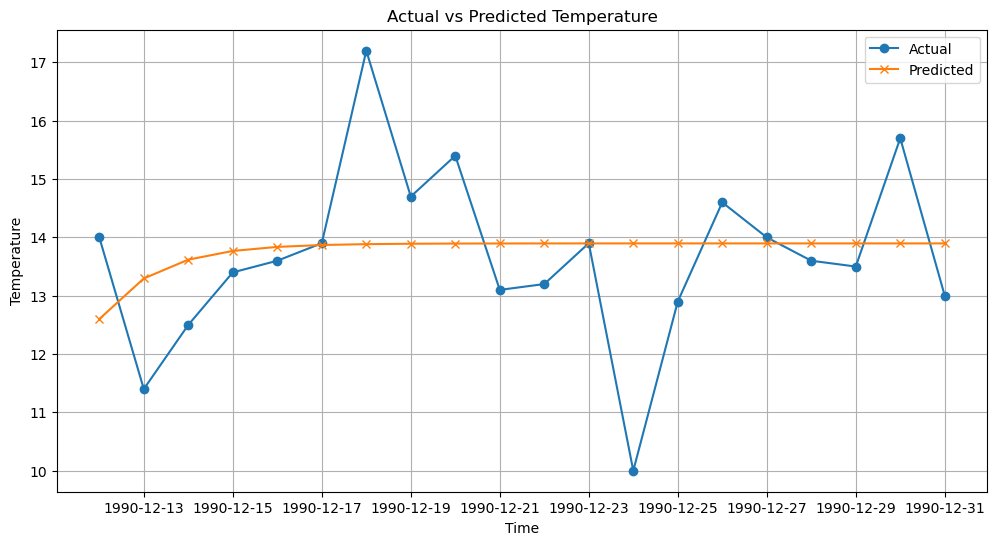

In [21]:
## Plot for visual comparison 📊

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual', marker='o')
plt.plot(test_data.index, forecast, label='Predicted', marker='x')
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
## Calculate error (like MSE or RMSE)

In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")


RMSE: 1.47


<h4>Interpretation</h4>
If actual and predicted curves overlap closely → your model is doing well.<br>

Lower RMSE → better model accuracy.<br>

If they diverge a lot, maybe tune (p, d, q) again.<br>